<a href="https://colab.research.google.com/github/mutai-star/db_demo/blob/master/Home.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Image loaded: (4080, 3060, 3)


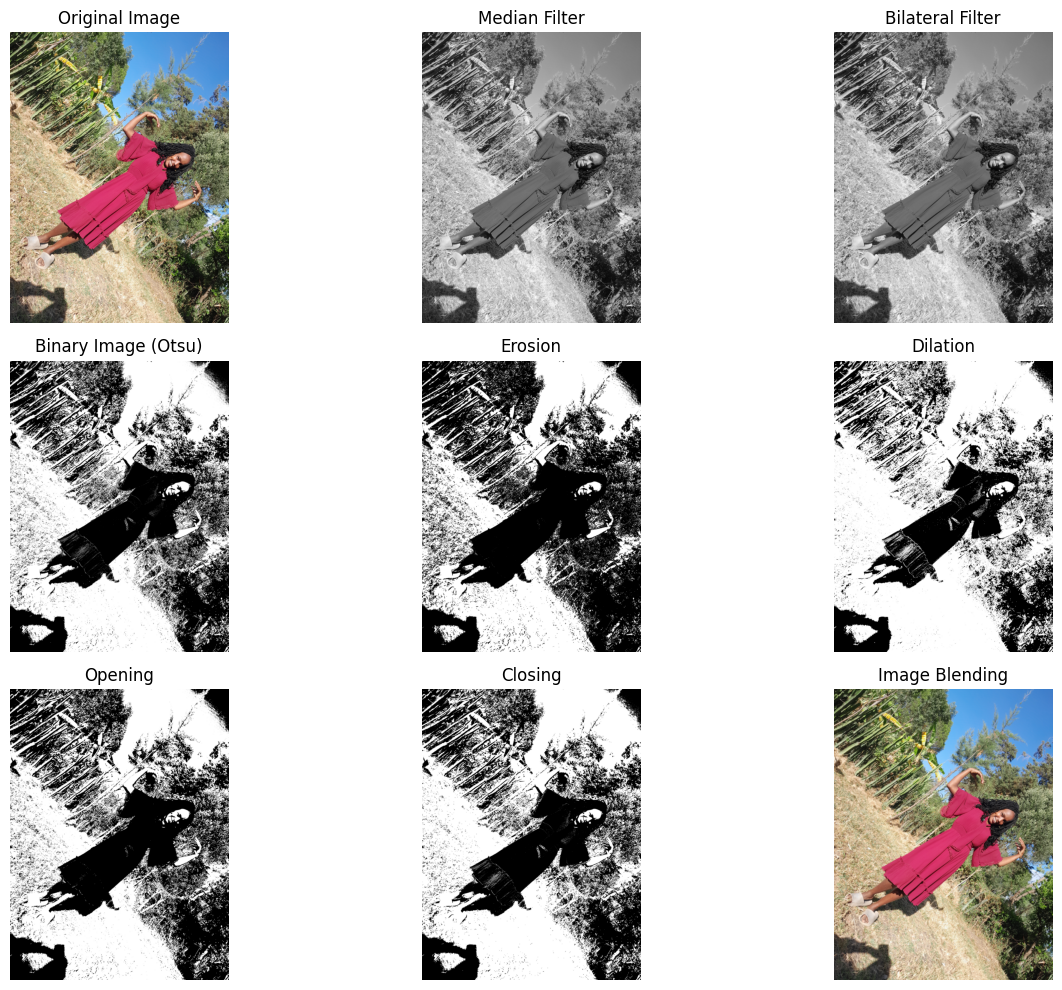

In [3]:
# ============================================
# NON-LINEAR FILTERING & MORPHOLOGY PIPELINE
# ============================================

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# --------------------------------------------
# 1. LOAD IMAGE (WINDOWS SAFE)
# --------------------------------------------

IMAGE_PATH = r"/content/20251206_081007.jpg"

if not os.path.exists(IMAGE_PATH):
    raise FileNotFoundError(f"❌ Image not found: {IMAGE_PATH}")

img = cv2.imread(IMAGE_PATH)

if img is None:
    raise RuntimeError("❌ Failed to load image")

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

print("✅ Image loaded:", img.shape)

# --------------------------------------------
# 2. NON-LINEAR FILTERING
# --------------------------------------------

# Median filter (salt-and-pepper noise removal)
median_filtered = cv2.medianBlur(img_gray, 5)

# Bilateral filter (edge-preserving smoothing)
bilateral_filtered = cv2.bilateralFilter(
    img_gray,
    d=9,
    sigmaColor=75,
    sigmaSpace=75
)

# --------------------------------------------
# 3. BINARY IMAGE PROCESSING
# --------------------------------------------

_, binary = cv2.threshold(
    img_gray,
    0,
    255,
    cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

# --------------------------------------------
# 4. MORPHOLOGICAL OPERATIONS
# --------------------------------------------

kernel = np.ones((3, 3), np.uint8)

# Erosion (shrinks foreground)
erosion = cv2.erode(binary, kernel, iterations=1)

# Dilation (expands foreground)
dilation = cv2.dilate(binary, kernel, iterations=1)

# Opening (erosion + dilation)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

# Closing (dilation + erosion)
closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# --------------------------------------------
# 5. IMAGE BLENDING
# --------------------------------------------

# Resize copy for blending demonstration
img2 = cv2.GaussianBlur(img, (21, 21), 5)

alpha = 0.7
beta = 0.3
blended = cv2.addWeighted(img, alpha, img2, beta, 0)

# --------------------------------------------
# 6. VISUALIZATION
# --------------------------------------------

plt.figure(figsize=(14, 10))

plt.subplot(3, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(3, 3, 2)
plt.imshow(median_filtered, cmap="gray")
plt.title("Median Filter")
plt.axis("off")

plt.subplot(3, 3, 3)
plt.imshow(bilateral_filtered, cmap="gray")
plt.title("Bilateral Filter")
plt.axis("off")

plt.subplot(3, 3, 4)
plt.imshow(binary, cmap="gray")
plt.title("Binary Image (Otsu)")
plt.axis("off")

plt.subplot(3, 3, 5)
plt.imshow(erosion, cmap="gray")
plt.title("Erosion")
plt.axis("off")

plt.subplot(3, 3, 6)
plt.imshow(dilation, cmap="gray")
plt.title("Dilation")
plt.axis("off")

plt.subplot(3, 3, 7)
plt.imshow(opening, cmap="gray")
plt.title("Opening")
plt.axis("off")

plt.subplot(3, 3, 8)
plt.imshow(closing, cmap="gray")
plt.title("Closing")
plt.axis("off")

plt.subplot(3, 3, 9)
plt.imshow(cv2.cvtColor(blended, cv2.COLOR_BGR2RGB))
plt.title("Image Blending")
plt.axis("off")

plt.tight_layout()
plt.show()


✅ Feature vector length: 24

SVM REPORT
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.33      1.00      0.50         2

    accuracy                           0.33         6
   macro avg       0.17      0.50      0.25         6
weighted avg       0.11      0.33      0.17         6


RF REPORT
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.33      1.00      0.50         2

    accuracy                           0.33         6
   macro avg       0.17      0.50      0.25         6
weighted avg       0.11      0.33      0.17         6



/usr/local/lib/python3.12/dist-packages/sklearn/decomposition/_pca.py:648: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicte

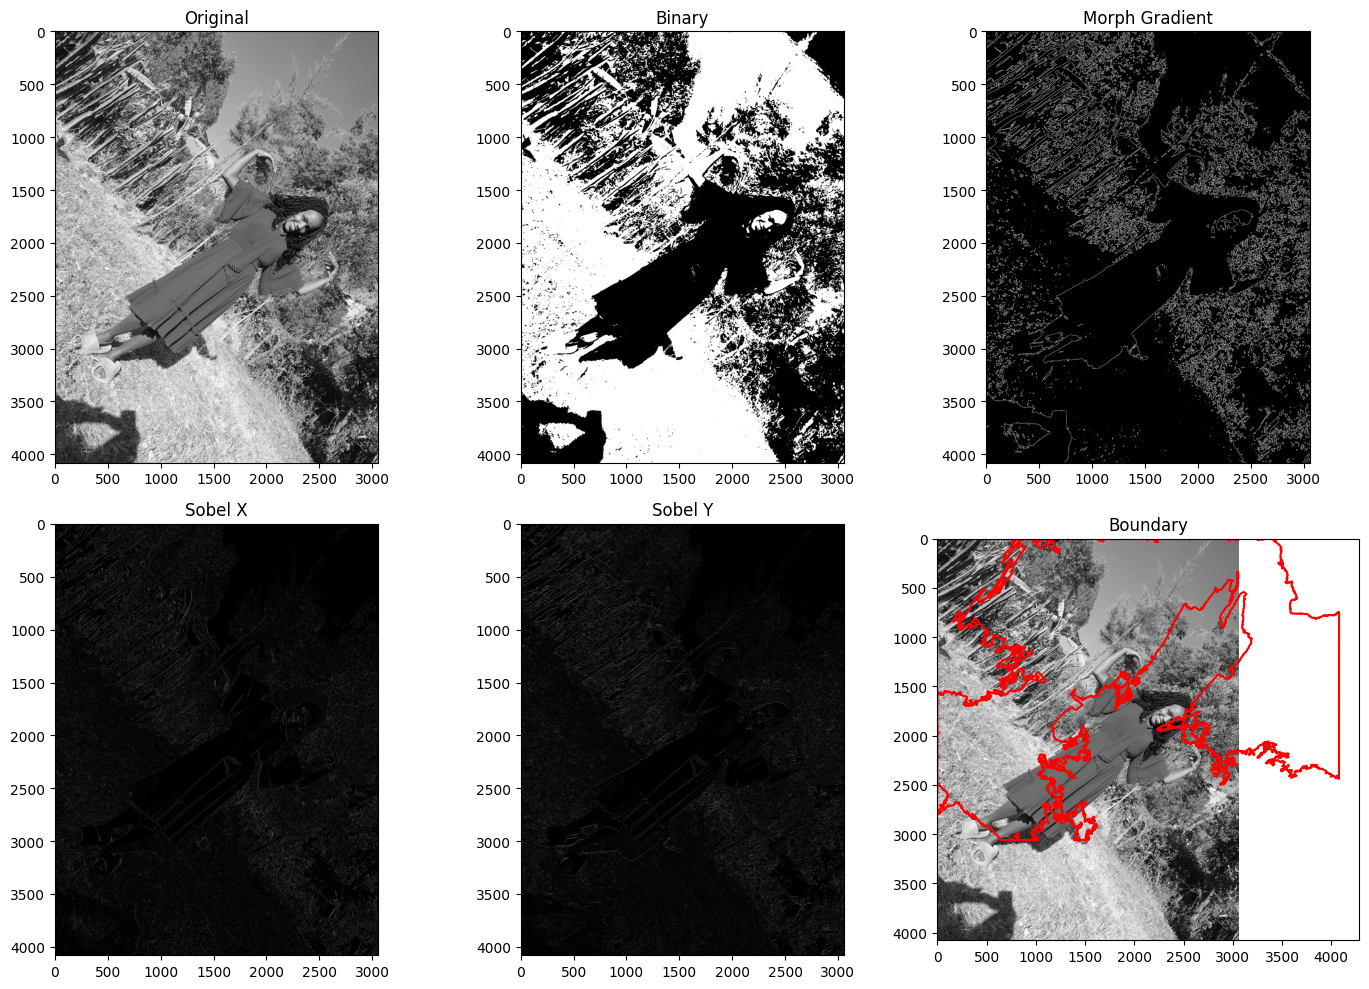

In [5]:
# ==============================================================
# COMPLETE IMAGE PROCESSING + FEATURE EXTRACTION + ML PIPELINE
# ==============================================================

import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import os

# --------------------------------------------------------------
# 1. LOAD IMAGE
# --------------------------------------------------------------
IMAGE_PATH = r"/content/20251206_081007.jpg"
assert os.path.exists(IMAGE_PATH), "❌ Image not found"

img = cv2.imread(IMAGE_PATH)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# --------------------------------------------------------------
# 2. NON-LINEAR FILTERING
# --------------------------------------------------------------
median = cv2.medianBlur(gray, 5)
bilateral = cv2.bilateralFilter(median, 9, 75, 75)

# --------------------------------------------------------------
# 3. EDGE FILTERS
# --------------------------------------------------------------
sobel_x = cv2.Sobel(bilateral, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(bilateral, cv2.CV_64F, 0, 1, ksize=3)
laplacian = cv2.Laplacian(bilateral, cv2.CV_64F)

# --------------------------------------------------------------
# 4. BINARY IMAGE + MORPHOLOGY
# --------------------------------------------------------------
_, binary = cv2.threshold(bilateral, 0, 255,
                           cv2.THRESH_BINARY + cv2.THRESH_OTSU)

kernel = np.ones((3,3), np.uint8)
erosion = cv2.erode(binary, kernel)
dilation = cv2.dilate(binary, kernel)
gradient = cv2.morphologyEx(binary, cv2.MORPH_GRADIENT, kernel)
tophat = cv2.morphologyEx(binary, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(binary, cv2.MORPH_BLACKHAT, kernel)

# --------------------------------------------------------------
# 5. CONNECTED COMPONENT ANALYSIS
# --------------------------------------------------------------
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary, 8)
num_components = num_labels - 1
mean_area = np.mean(stats[1:, cv2.CC_STAT_AREA])

# --------------------------------------------------------------
# 6. BOUNDARY EXTRACTION
# --------------------------------------------------------------
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
boundary = max(contours, key=cv2.contourArea).squeeze()

# --------------------------------------------------------------
# 7. FREEMAN CHAIN CODE
# --------------------------------------------------------------
def freeman_chain(boundary):
    dirs = {(0,1):0,(-1,1):1,(-1,0):2,(-1,-1):3,
            (0,-1):4,(1,-1):5,(1,0):6,(1,1):7}
    chain = []
    for i in range(len(boundary)-1):
        dy = boundary[i+1][0] - boundary[i][0]
        dx = boundary[i+1][1] - boundary[i][1]
        chain.append(dirs.get((dy,dx),0))
    return np.array(chain)

chain = freeman_chain(boundary)
chain_hist = np.histogram(chain, bins=8, range=(0,8))[0]

# --------------------------------------------------------------
# 8. CURVATURE SCALE SPACE (CSS)
# --------------------------------------------------------------
def curvature(points, sigma=2):
    x = gaussian_filter1d(points[:,1], sigma)
    y = gaussian_filter1d(points[:,0], sigma)
    dx, dy = np.gradient(x), np.gradient(y)
    ddx, ddy = np.gradient(dx), np.gradient(dy)
    return (dx*ddy - dy*ddx) / ((dx*dx + dy*dy)**1.5 + 1e-8)

curv = curvature(boundary)
curv_mean = np.mean(np.abs(curv))
curv_std = np.std(curv)

# --------------------------------------------------------------
# 9. SHAPE FEATURES
# --------------------------------------------------------------
area = cv2.contourArea(boundary)
perimeter = cv2.arcLength(boundary, True)
compactness = (perimeter**2)/(area+1e-6)

moments = cv2.moments(boundary)
hu = cv2.HuMoments(moments).flatten()

sobel_x_energy = np.mean(np.abs(sobel_x))
sobel_y_energy = np.mean(np.abs(sobel_y))

# --------------------------------------------------------------
# 10. FEATURE VECTOR
# --------------------------------------------------------------
feature_vector = np.hstack([
    area, perimeter, compactness,
    sobel_x_energy, sobel_y_energy,
    num_components, mean_area,
    chain_hist,
    curv_mean, curv_std,
    hu
])

print("✅ Feature vector length:", len(feature_vector))

# --------------------------------------------------------------
# 11. MACHINE LEARNING (DEMO)
# --------------------------------------------------------------
X = np.array([feature_vector]*20)
y = np.array([1,0]*10)  # tumor vs normal (demo)

X = StandardScaler().fit_transform(X)
X = PCA(n_components=0.95).fit_transform(X)

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3)

svm = SVC(kernel='rbf')
rf = RandomForestClassifier()

svm.fit(Xtr, ytr)
rf.fit(Xtr, ytr)

print("\nSVM REPORT\n", classification_report(yte, svm.predict(Xte)))
print("\nRF REPORT\n", classification_report(yte, rf.predict(Xte)))

# --------------------------------------------------------------
# 12. VISUALIZATION
# --------------------------------------------------------------
plt.figure(figsize=(14,10))
plt.subplot(2,3,1), plt.imshow(gray,'gray'), plt.title("Original")
plt.subplot(2,3,2), plt.imshow(binary,'gray'), plt.title("Binary")
plt.subplot(2,3,3), plt.imshow(gradient,'gray'), plt.title("Morph Gradient")
plt.subplot(2,3,4), plt.imshow(np.abs(sobel_x),'gray'), plt.title("Sobel X")
plt.subplot(2,3,5), plt.imshow(np.abs(sobel_y),'gray'), plt.title("Sobel Y")
plt.subplot(2,3,6), plt.imshow(gray,'gray')
plt.plot(boundary[:,1], boundary[:,0],'r')
plt.title("Boundary")
plt.tight_layout()
plt.show()
